In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
def csvRead(filepath):
    data = np.genfromtxt(filepath, delimiter=',', skip_header=1)
    return data

darthPlagueis = csvRead('FLIGHT DATA/pcb3_darthplagueis_flightdata.csv')
apple = csvRead('FLIGHT DATA/pcb4_apple_flightdata.csv')

In [11]:
def filterData(array):
    deployedRow = np.where(array[:,0] == 2)[0][0]
    landedRow = np.where(array[:,0] == 5)[0][0]
    return array[deployedRow-1200:landedRow+100]

def stateTransitionRows(array):
    rows = []
    for i in range(1,6):
        rows.append(np.where(array[:,0] == i)[0][0])
    return rows

def plotData(array, headers, lineColor):
    timeCol = 1
    yColumns = [0, 2, 4, 15, 8, 12, 13]
    numPlots = len(yColumns)
    plotColumns = 1  # (numPlots+1)//2
    stateChangeRows = stateTransitionRows(array)
    print('State changes at times: ', end=' ')
    for i in range(1,6):
        print(array[stateChangeRows[i-1], timeCol], end='  ')
    print()
    fig, axs = plt.subplots(numPlots, plotColumns, figsize=(16, numPlots*4))
    for i in range(numPlots):
        currentAx = axs[i]
        currentAx.plot(array[:,timeCol], array[:,yColumns[i]], linewidth=0.5, color=lineColor)
        currentAx.set_title(headers[yColumns[i]])
        for row in stateChangeRows:
            currentAx.axvline(array[row,timeCol], color='black', linestyle='dotted', linewidth=0.5)
        if (headers[yColumns[i]] == 'Smooth altitude (m)'):
            currentAx.axhline(167, color='black', linestyle='dotted', linewidth=0.5)
            currentAx.axhline(115, color='black', linestyle='dotted', linewidth=0.5)

In [8]:
dataHeaders = ['State', 'Time (ms)', 'Pressure [Pa]', 
               'Altitude (m)', 'Smooth altitude (m)', 'Delta altitude (m/s)', 'Smooth delta altitude (m/s)',
               'Temperature (C)', 'Accel X', 'Accel Y', 'Accel Z',
               'Batt Sense', 'Cut Sense 1', 'Cut Sense 2', 'Current Sense', 'Photoresistor']
dataSets = [darthPlagueis, apple]

def blackMagic(array, lineColor):
    plotData(filterData(array), dataHeaders, lineColor)

# Bobby Tables flight

Both PCBs moved correctly through all state transitions. Note that the pressure spiked when the main parachute charge went off which led to a dip in smoothed altitude, which would have triggered an early disreef if the line cutters had been in the deployed state. However, because there was a 2 second delay implemented between the photoresistor first rising above 400 and the actual deployed state, this anomalous reading had time to phase out of the altitude array before the state changed.

In the future, outlier readings should be filtered out.

As a side note, thanks to the fairly standardized parachute wrapping technique, x-acceleration on both this flight and the previous day's flight was the largest component of acceleration. Also, the cycling photoresistor reading on Darth Plagueis was most likely due to etape not fully covering a blinking LED.

## Darth Plagueis (PCB 3)

State changes at times:  5720695.0  5781198.0  5788301.0  5794902.0  5832317.0  


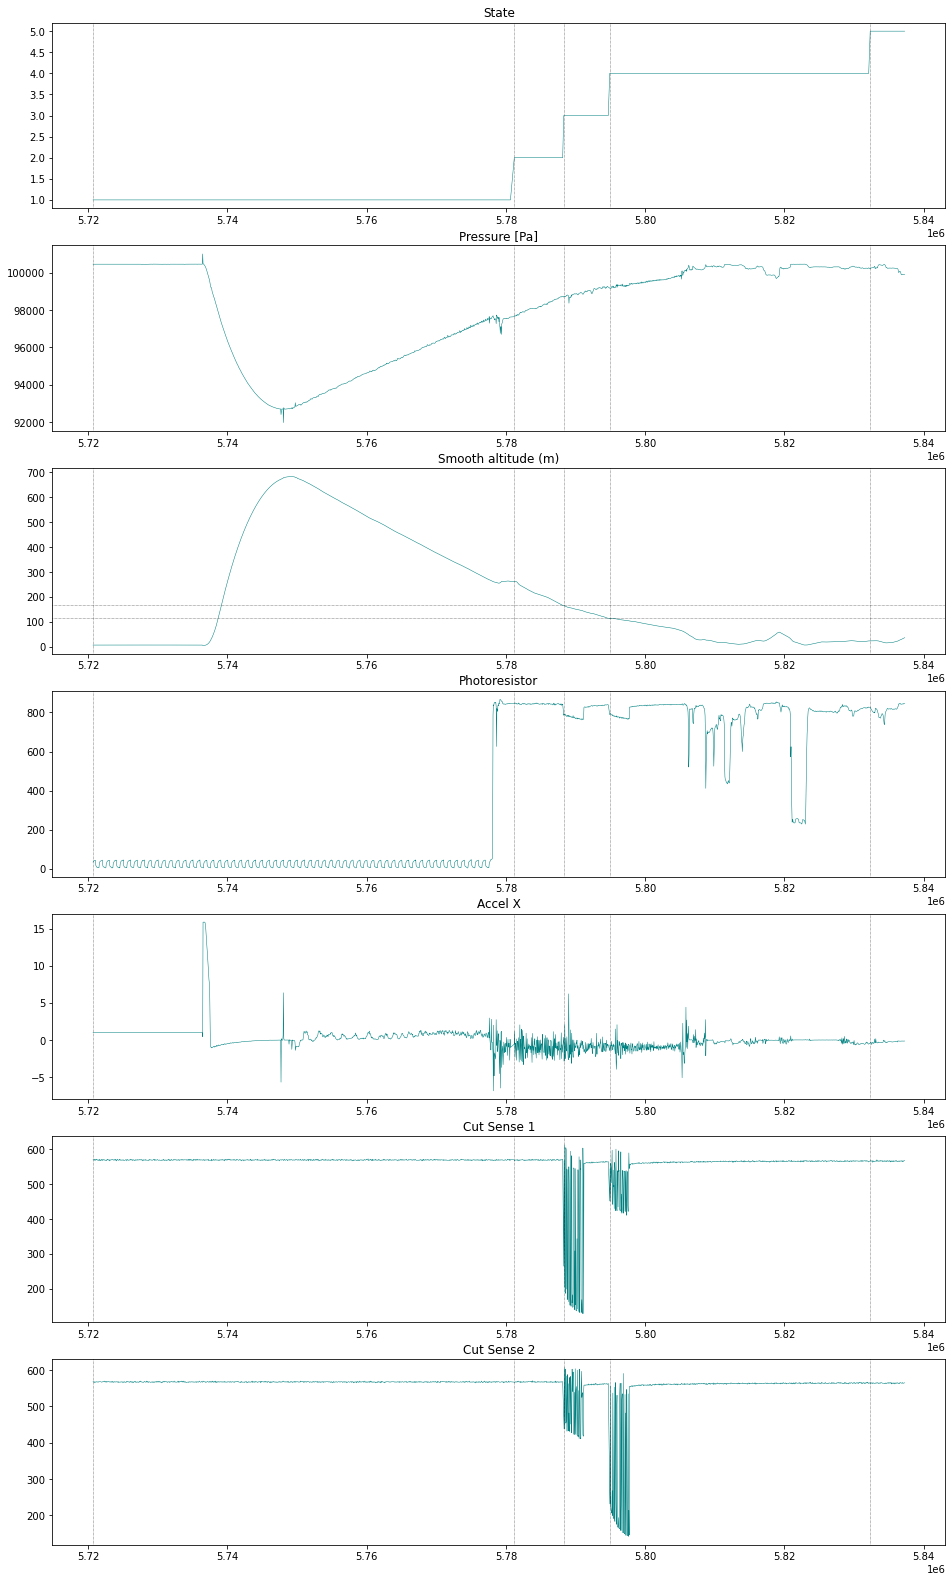

In [12]:
blackMagic(darthPlagueis, 'teal')

## Apple (PCB 4)

State changes at times:  5218032.0  5278429.0  5289593.0  5293762.0  5306532.0  


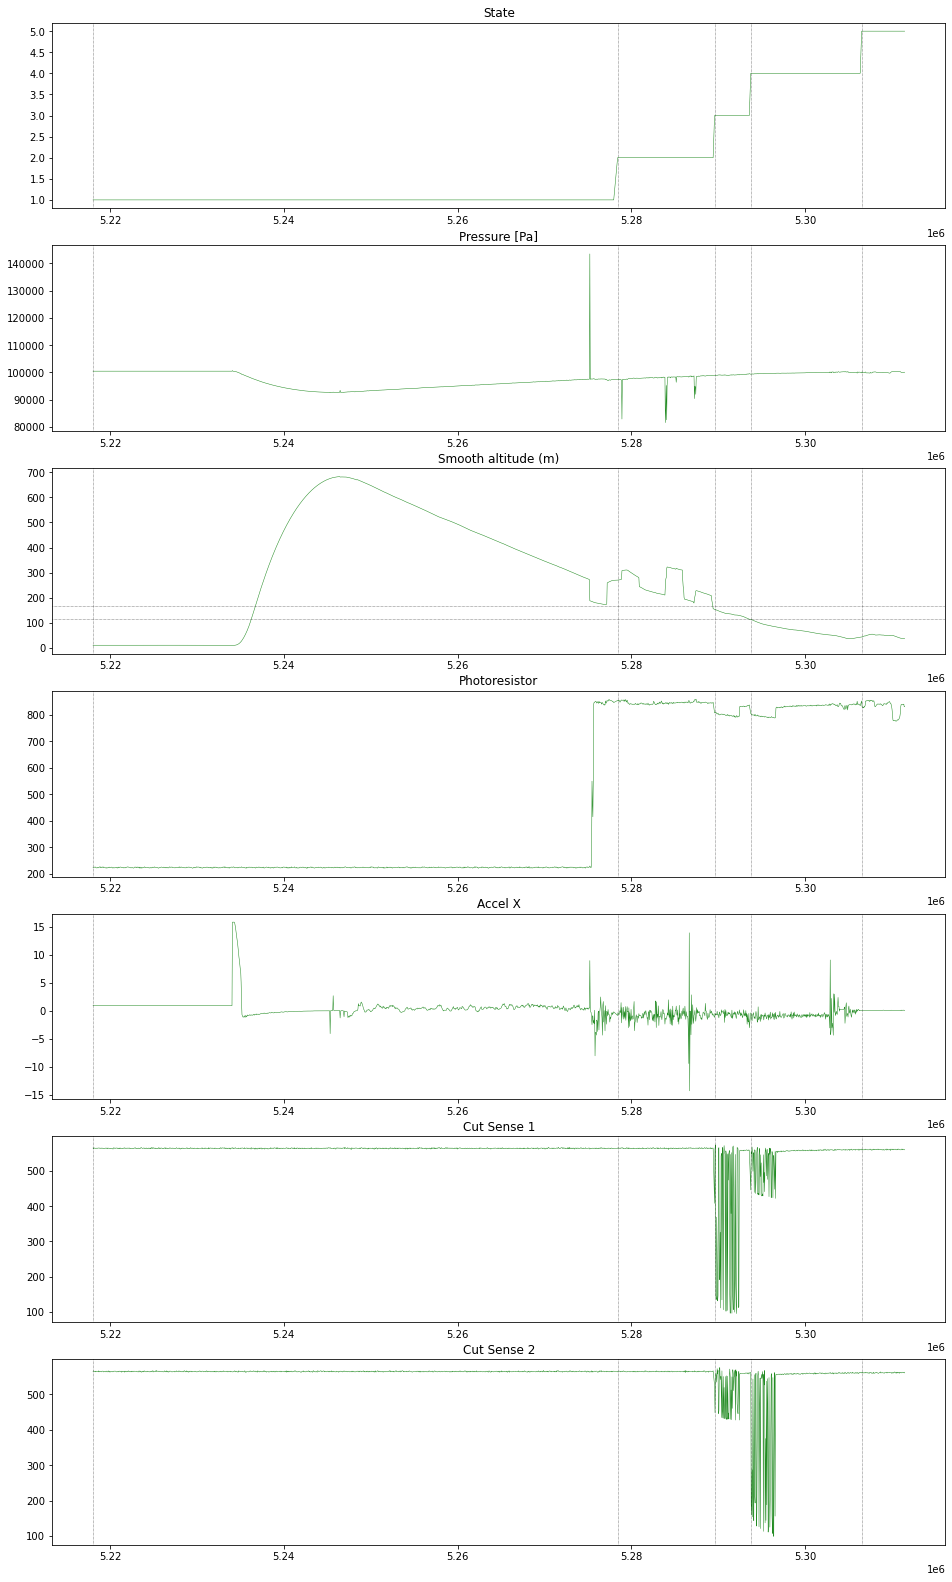

In [14]:
blackMagic(apple, 'forestgreen')